<a href="https://colab.research.google.com/github/GarvitMathur667/EDAProject/blob/main/Copy_of_Untitled31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

df=pd.read_csv("telco customer churn.csv")
df.head()

customerID  gender  SeniorCitizen Partner Dependents tenure PhoneService  \
0  7590-VHVEG  Female            0.0     Yes         No      1           No   
1  5575-GNVDE    Male            0.0      No         No     34          Yes   
2  3668-QPYBK    Male            0.0      No         No      2          Yes   
3  7795-CFOCW    Male            0.0      No         No     45           No   
4  9237-HQITU  Female            0.0      No         No      2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

## Dimensions

In [ ]:
print(df.shape)

(7043, 21)


In [ ]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
print("Rows:",df.shape[0])
print("Columns:",df.shape[1])

Rows: 7043
Columns: 21


In [ ]:
print(df['PaymentMethod'].value_counts())

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


In [ ]:
print(df.values)

[['7590-VHVEG' 'Female' 0.0 ... 29.85 '29.85' 'No']
 ['5575-GNVDE' 'Male' 0.0 ... 56.95 '1889.5' 'No']
 ['3668-QPYBK' 'Male' 0.0 ... 53.85 '108.15' 'Yes']
 ...
 ['4801-JZAZL' 'Female' 0.0 ... 29.6 '346.45' 'No']
 ['8361-LTMKD' 'Male' 1.0 ... 74.4 '306.6' 'Yes']
 ['3186-AJIEK' 'Male' 0.0 ... 105.65 '6844.5' 'No']]


In [ ]:
print(df.values.reshape(-1,1))

[['7590-VHVEG']
 ['Female']
 [0.0]
 ...
 [105.65]
 ['6844.5']
 ['No']]


In [ ]:
stacked=df.stack()
print(stacked)

0     customerID                         7590-VHVEG
      gender                                 Female
      SeniorCitizen                             0.0
      Partner                                   Yes
      Dependents                                 No
                                    ...            
7042  PaperlessBilling                          Yes
      PaymentMethod       Bank transfer (automatic)
      MonthlyCharges                         105.65
      TotalCharges                           6844.5
      Churn                                      No
Length: 147885, dtype: object


In [ ]:
unstacked=stacked.unstack()
print(unstacked)

      customerID  gender SeniorCitizen Partner Dependents tenure PhoneService  \
0     7590-VHVEG  Female           0.0     Yes         No      1           No   
1     5575-GNVDE    Male           0.0      No         No     34          Yes   
2     3668-QPYBK    Male           0.0      No         No      2          Yes   
3     7795-CFOCW    Male           0.0      No         No     45           No   
4     9237-HQITU  Female           0.0      No         No      2          Yes   
...          ...     ...           ...     ...        ...    ...          ...   
7038  6840-RESVB    Male           0.0     Yes        Yes     24          Yes   
7039  2234-XADUH  Female           0.0     Yes        Yes     72          Yes   
7040  4801-JZAZL  Female           0.0     Yes        Yes     11           No   
7041  8361-LTMKD    Male           1.0     Yes         No      4          Yes   
7042  3186-AJIEK    Male           0.0      No         No     66          Yes   

         MultipleLines Inte

## Summary Statistics

In [ ]:
df.describe()

SeniorCitizen  MonthlyCharges
count    7035.000000     7040.000000
mean        0.162331       64.761889
std         0.368781       30.087384
min         0.000000       18.250000
25%         0.000000       35.500000
50%         0.000000       70.350000
75%         0.000000       89.850000
max         1.000000      118.750000

In [ ]:
df.describe(include='all')

customerID gender  SeniorCitizen Partner Dependents tenure  \
count         7043   7043    7035.000000    7038       7043   7042   
unique        7043      2            NaN       2          3     74   
top     3186-AJIEK   Male            NaN      No         No      1   
freq             1   3555            NaN    3640       4931    613   
mean           NaN    NaN       0.162331     NaN        NaN    NaN   
std            NaN    NaN       0.368781     NaN        NaN    NaN   
min            NaN    NaN       0.000000     NaN        NaN    NaN   
25%            NaN    NaN       0.000000     NaN        NaN    NaN   
50%            NaN    NaN       0.000000     NaN        NaN    NaN   
75%            NaN    NaN       0.000000     NaN        NaN    NaN   
max            NaN    NaN       1.000000     NaN        NaN    NaN   

       PhoneService MultipleLines InternetService OnlineSecurity  ...  \
count          7043          7043            7043           7043  ...   
unique            2             3               3              3  ...   
top             Yes            No     Fiber optic             No  ...   
freq           6361          3390            3096           3498  ...   
mean            NaN           NaN             NaN            NaN  ...   
std             NaN           NaN             NaN            NaN  ...   
min             NaN           NaN             NaN            NaN  ...   
25%             NaN           NaN             NaN            NaN  ...   
50%             NaN           NaN             NaN            NaN  ...   
75%             NaN           NaN             NaN            NaN  ...   
max             NaN           NaN             NaN            NaN  ...   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7043        7043        7043            7043   
unique                3           4           3               3   
top                  No          No          No              No   
freq               3095        3472        2810            2785   
mean                NaN         NaN         NaN             NaN   
std                 NaN         NaN         NaN             NaN   
min                 NaN         NaN         NaN             NaN   
25%                 NaN         NaN         NaN             NaN   
50%                 NaN         NaN         NaN             NaN   
75%                 NaN         NaN         NaN             NaN   
max                 NaN         NaN         NaN             NaN   

              Contract PaperlessBilling     PaymentMethod MonthlyCharges  \
count             7043             7043              7043    7040.000000   
unique               3                3                 4            NaN   
top     Month-to-month              Yes  Electronic check            NaN   
freq              3875             4170              2365            NaN   
mean               NaN              NaN               NaN      64.761889   
std                NaN              NaN               NaN      30.087384   
min                NaN              NaN               NaN      18.250000   
25%                NaN              NaN               NaN      35.500000   
50%                NaN              NaN               NaN      70.350000   
75%                NaN              NaN               NaN      89.850000   
max                NaN              NaN               NaN     118.750000   

        TotalCharges Churn  
count           7043  7042  
unique          6531     3  
top                     No  
freq              11  5172  
mean             NaN   NaN  
std              NaN   NaN  
min              NaN   NaN  
25%              NaN   NaN  
50%              NaN   NaN  
75%              NaN   NaN  
max              NaN   NaN  

[11 rows x 21 columns]

## Data Handling

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [ ]:
df1=df.drop_duplicates()
print(df1)

      customerID  gender  SeniorCitizen Partner Dependents tenure  \
0     7590-VHVEG  Female            0.0     Yes         No      1   
1     5575-GNVDE    Male            0.0      No         No     34   
2     3668-QPYBK    Male            0.0      No         No      2   
3     7795-CFOCW    Male            0.0      No         No     45   
4     9237-HQITU  Female            0.0      No         No      2   
...          ...     ...            ...     ...        ...    ...   
7038  6840-RESVB    Male            0.0     Yes        Yes     24   
7039  2234-XADUH  Female            0.0     Yes        Yes     72   
7040  4801-JZAZL  Female            0.0     Yes        Yes     11   
7041  8361-LTMKD    Male            1.0     Yes         No      4   
7042  3186-AJIEK    Male            0.0      No         No     66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes    

In [ ]:
df2 = df1.replace({
    'No internet service': 'No',
    'No phone service': 'No',
    '?': np.nan,
    '-': np.nan,
    ' ': np.nan,
    'Yes': 1,
    'No': 0
})
df2.head()

/tmp/ipython-input-3415150756.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2 = df1.replace({


customerID  gender  SeniorCitizen  Partner  Dependents tenure  \
0  7590-VHVEG  Female            0.0      1.0         0.0      1   
1  5575-GNVDE    Male            0.0      0.0         0.0     34   
2  3668-QPYBK    Male            0.0      0.0         0.0      2   
3  7795-CFOCW    Male            0.0      0.0         0.0     45   
4  9237-HQITU  Female            0.0      0.0         0.0      2   

   PhoneService MultipleLines InternetService OnlineSecurity  ...  \
0             0            No             DSL              0  ...   
1             1             0             DSL              1  ...   
2             1             0             DSL              1  ...   
3             0            No             DSL              1  ...   
4             1             0     Fiber optic              0  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                0           0           0               0  Month-to-month   
1                1           0           0               0        One year   
2                0           0           0               0  Month-to-month   
3                1           1           0               0        One year   
4                0           0           0               0  Month-to-month   

  PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0              1.0           Electronic check          29.85         29.85   
1              0.0               Mailed check          56.95        1889.5   
2              1.0               Mailed check          53.85        108.15   
3              0.0  Bank transfer (automatic)          42.30       1840.75   
4              1.0           Electronic check          70.70        151.65   

  Churn  
0   0.0  
1   0.0  
2   1.0  
3   0.0  
4   1.0  

[5 rows x 21 columns]

In [ ]:
df2.isnull()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0          False   False          False    False       False   False   
1          False   False          False    False       False   False   
2          False   False          False    False       False   False   
3          False   False          False    False       False   False   
4          False   False          False    False       False   False   
...          ...     ...            ...      ...         ...     ...   
7038       False   False          False    False       False   False   
7039       False   False          False    False       False   False   
7040       False   False          False    False       False   False   
7041       False   False          False    False       False   False   
7042       False   False          False    False       False   False   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0            False          False            False           False  ...   
1            False          False            False           False  ...   
2            False          False            False           False  ...   
3            False          False            False           False  ...   
4            False          False            False           False  ...   
...            ...            ...              ...             ...  ...   
7038         False          False            False           False  ...   
7039         False          False            False           False  ...   
7040         False          False            False           False  ...   
7041         False          False            False           False  ...   
7042         False          False            False           False  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                False        False        False            False     False   
1                False        False        False            False     False   
2                False        False        False            False     False   
3                False        False        False            False     False   
4                False        False        False            False     False   
...                ...          ...          ...              ...       ...   
7038             False        False        False            False     False   
7039             False        False        False            False     False   
7040             False        False        False            False     False   
7041             False        False        False            False     False   
7042             False        False        False            False     False   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                False          False           False         False  False  
1                False          False           False         False  False  
2                False          False           False         False  False  
3                False          False           False         False  False  
4                False          False           False         False  False  
...                ...            ...             ...           ...    ...  
7038             False          False           False         False  False  
7039             False          False           False         False  False  
7040             False          False           False         False  False  
7041             False          False           False         False  False  
7042             False          False           False         False  False  

[7043 rows x 21 columns]

In [ ]:
df2.notnull()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           True    True           True     True        True    True   
1           True    True           True     True        True    True   
2           True    True           True     True        True    True   
3           True    True           True     True        True    True   
4           True    True           True     True        True    True   
...          ...     ...            ...      ...         ...     ...   
7038        True    True           True     True        True    True   
7039        True    True           True     True        True    True   
7040        True    True           True     True        True    True   
7041        True    True           True     True        True    True   
7042        True    True           True     True        True    True   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             True           True             True            True  ...   
1             True           True             True            True  ...   
2             True           True             True            True  ...   
3             True           True             True            True  ...   
4             True           True             True            True  ...   
...            ...            ...              ...             ...  ...   
7038          True           True             True            True  ...   
7039          True           True             True            True  ...   
7040          True           True             True            True  ...   
7041          True           True             True            True  ...   
7042          True           True             True            True  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 True         True         True             True      True   
1                 True         True         True             True      True   
2                 True         True         True             True      True   
3                 True         True         True             True      True   
4                 True         True         True             True      True   
...                ...          ...          ...              ...       ...   
7038              True         True         True             True      True   
7039              True         True         True             True      True   
7040              True         True         True             True      True   
7041              True         True         True             True      True   
7042              True         True         True             True      True   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 True           True            True          True   True  
1                 True           True            True          True   True  
2                 True           True            True          True   True  
3                 True           True            True          True   True  
4                 True           True            True          True   True  
...                ...            ...             ...           ...    ...  
7038              True           True            True          True   True  
7039              True           True            True          True   True  
7040              True           True            True          True   True  
7041              True           True            True          True   True  
7042              True           True            True          True   True  

[7043 rows x 21 columns]

In [ ]:
df2.isnull().sum()

customerID           0
gender               0
SeniorCitizen        8
Partner              5
Dependents           2
tenure               2
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          1
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     1
PaymentMethod        0
MonthlyCharges       3
TotalCharges        11
Churn                3
dtype: int64

In [ ]:
df2.isnull().sum().sum()

np.int64(36)

In [ ]:
int(np.int64(df2.isnull().sum().sum()))

36

In [ ]:
df2.count()

customerID          7043
gender              7043
SeniorCitizen       7035
Partner             7038
Dependents          7041
tenure              7041
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7042
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7042
PaymentMethod       7043
MonthlyCharges      7040
TotalCharges        7032
Churn               7040
dtype: int64

In [ ]:
df2.dropna()

customerID  gender  SeniorCitizen  Partner  Dependents tenure  \
0     7590-VHVEG  Female            0.0      1.0         0.0      1   
1     5575-GNVDE    Male            0.0      0.0         0.0     34   
2     3668-QPYBK    Male            0.0      0.0         0.0      2   
3     7795-CFOCW    Male            0.0      0.0         0.0     45   
4     9237-HQITU  Female            0.0      0.0         0.0      2   
...          ...     ...            ...      ...         ...    ...   
7038  6840-RESVB    Male            0.0      1.0         1.0     24   
7039  2234-XADUH  Female            0.0      1.0         1.0     72   
7040  4801-JZAZL  Female            0.0      1.0         1.0     11   
7041  8361-LTMKD    Male            1.0      1.0         0.0      4   
7042  3186-AJIEK    Male            0.0      0.0         0.0     66   

      PhoneService MultipleLines InternetService OnlineSecurity  ...  \
0                0            No             DSL              0  ...   
1                1             0             DSL              1  ...   
2                1             0             DSL              1  ...   
3                0            No             DSL              1  ...   
4                1             0     Fiber optic              0  ...   
...            ...           ...             ...            ...  ...   
7038             1             1             DSL              1  ...   
7039             1             1     Fiber optic              0  ...   
7040             0            No             DSL              1  ...   
7041             1             1     Fiber optic              0  ...   
7042             1             0     Fiber optic              1  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                   0           0           0               0  Month-to-month   
1                   1           0           0               0        One year   
2                   0           0           0               0  Month-to-month   
3                   1           1           0               0        One year   
4                   0           0           0               0  Month-to-month   
...               ...         ...         ...             ...             ...   
7038                1           1           1               1        One year   
7039                1           0           1               1        One year   
7040                0           0           0               0  Month-to-month   
7041                0           0           0               0  Month-to-month   
7042                1           1           1               1        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 1.0           Electronic check          29.85         29.85   
1                 0.0               Mailed check          56.95        1889.5   
2                 1.0               Mailed check          53.85        108.15   
3                 0.0  Bank transfer (automatic)          42.30       1840.75   
4                 1.0           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              1.0               Mailed check          84.80        1990.5   
7039              1.0    Credit card (automatic)         103.20        7362.9   
7040              1.0           Electronic check          29.60        346.45   
7041              1.0               Mailed check          74.40         306.6   
7042              1.0  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0      0.0  
1      0.0  
2      1.0  
3      0.0  
4      1.0  
...    ...  
7038   0.0  
7039   0.0  
7040   0.0  
7041   1.0  
7042   0.0  

[7009 rows x 21 columns]

In [ ]:
df2.dropna(axis=1)

customerID  gender  PhoneService MultipleLines InternetService  \
0     7590-VHVEG  Female             0            No             DSL   
1     5575-GNVDE    Male             1             0             DSL   
2     3668-QPYBK    Male             1             0             DSL   
3     7795-CFOCW    Male             0            No             DSL   
4     9237-HQITU  Female             1             0     Fiber optic   
...          ...     ...           ...           ...             ...   
7038  6840-RESVB    Male             1             1             DSL   
7039  2234-XADUH  Female             1             1     Fiber optic   
7040  4801-JZAZL  Female             0            No             DSL   
7041  8361-LTMKD    Male             1             1     Fiber optic   
7042  3186-AJIEK    Male             1             0     Fiber optic   

     OnlineSecurity OnlineBackup DeviceProtection StreamingTV StreamingMovies  \
0                 0            1                0           0               0   
1                 1            0                1           0               0   
2                 1            1                0           0               0   
3                 1            0                1           0               0   
4                 0            0                0           0               0   
...             ...          ...              ...         ...             ...   
7038              1            0                1           1               1   
7039              0            1                1           1               1   
7040              1            0                0           0               0   
7041              0            0                0           0               0   
7042              1            0                1           1               1   

            Contract              PaymentMethod  
0     Month-to-month           Electronic check  
1           One year               Mailed check  
2     Month-to-month               Mailed check  
3           One year  Bank transfer (automatic)  
4     Month-to-month           Electronic check  
...              ...                        ...  
7038        One year               Mailed check  
7039        One year    Credit card (automatic)  
7040  Month-to-month           Electronic check  
7041  Month-to-month               Mailed check  
7042        Two year  Bank transfer (automatic)  

[7043 rows x 12 columns]

In [ ]:
float(np.float64(df2.MonthlyCharges.sum()))

455923.7

In [ ]:
float(np.float64(df2.MonthlyCharges.mean()))

64.76188920454545

In [ ]:
df2.MonthlyCharges.cumsum()

0           29.85
1           86.80
2          140.65
3          182.95
4          253.65
          ...    
7038    455610.85
7039    455714.05
7040    455743.65
7041    455818.05
7042    455923.70
Name: MonthlyCharges, Length: 7043, dtype: float64

In [ ]:
df2.fillna(0)

customerID  gender  SeniorCitizen  Partner  Dependents tenure  \
0     7590-VHVEG  Female            0.0      1.0         0.0      1   
1     5575-GNVDE    Male            0.0      0.0         0.0     34   
2     3668-QPYBK    Male            0.0      0.0         0.0      2   
3     7795-CFOCW    Male            0.0      0.0         0.0     45   
4     9237-HQITU  Female            0.0      0.0         0.0      2   
...          ...     ...            ...      ...         ...    ...   
7038  6840-RESVB    Male            0.0      1.0         1.0     24   
7039  2234-XADUH  Female            0.0      1.0         1.0     72   
7040  4801-JZAZL  Female            0.0      1.0         1.0     11   
7041  8361-LTMKD    Male            1.0      1.0         0.0      4   
7042  3186-AJIEK    Male            0.0      0.0         0.0     66   

      PhoneService MultipleLines InternetService OnlineSecurity  ...  \
0                0            No             DSL              0  ...   
1                1             0             DSL              1  ...   
2                1             0             DSL              1  ...   
3                0            No             DSL              1  ...   
4                1             0     Fiber optic              0  ...   
...            ...           ...             ...            ...  ...   
7038             1             1             DSL              1  ...   
7039             1             1     Fiber optic              0  ...   
7040             0            No             DSL              1  ...   
7041             1             1     Fiber optic              0  ...   
7042             1             0     Fiber optic              1  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                   0           0           0               0  Month-to-month   
1                   1           0           0               0        One year   
2                   0           0           0               0  Month-to-month   
3                   1           1           0               0        One year   
4                   0           0           0               0  Month-to-month   
...               ...         ...         ...             ...             ...   
7038                1           1           1               1        One year   
7039                1           0           1               1        One year   
7040                0           0           0               0  Month-to-month   
7041                0           0           0               0  Month-to-month   
7042                1           1           1               1        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 1.0           Electronic check          29.85         29.85   
1                 0.0               Mailed check          56.95        1889.5   
2                 1.0               Mailed check          53.85        108.15   
3                 0.0  Bank transfer (automatic)          42.30       1840.75   
4                 1.0           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              1.0               Mailed check          84.80        1990.5   
7039              1.0    Credit card (automatic)         103.20        7362.9   
7040              1.0           Electronic check          29.60        346.45   
7041              1.0               Mailed check          74.40         306.6   
7042              1.0  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0      0.0  
1      0.0  
2      1.0  
3      0.0  
4      1.0  
...    ...  
7038   0.0  
7039   0.0  
7040   0.0  
7041   1.0  
7042   0.0  

[7043 rows x 21 columns]

In [ ]:
df3=df2.fillna(method='ffill')
print(df3)

      customerID  gender  SeniorCitizen  Partner  Dependents tenure  \
0     7590-VHVEG  Female            0.0      1.0         0.0      1   
1     5575-GNVDE    Male            0.0      0.0         0.0     34   
2     3668-QPYBK    Male            0.0      0.0         0.0      2   
3     7795-CFOCW    Male            0.0      0.0         0.0     45   
4     9237-HQITU  Female            0.0      0.0         0.0      2   
...          ...     ...            ...      ...         ...    ...   
7038  6840-RESVB    Male            0.0      1.0         1.0     24   
7039  2234-XADUH  Female            0.0      1.0         1.0     72   
7040  4801-JZAZL  Female            0.0      1.0         1.0     11   
7041  8361-LTMKD    Male            1.0      1.0         0.0      4   
7042  3186-AJIEK    Male            0.0      0.0         0.0     66   

      PhoneService MultipleLines InternetService OnlineSecurity  ...  \
0                0            No             DSL              0  ...   
1  

/tmp/ipython-input-126786042.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df3=df2.fillna(method='ffill')


In [ ]:
df2.fillna(method='bfill')

/tmp/ipython-input-2667140817.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2.fillna(method='bfill')


customerID  gender  SeniorCitizen  Partner  Dependents tenure  \
0     7590-VHVEG  Female            0.0      1.0         0.0      1   
1     5575-GNVDE    Male            0.0      0.0         0.0     34   
2     3668-QPYBK    Male            0.0      0.0         0.0      2   
3     7795-CFOCW    Male            0.0      0.0         0.0     45   
4     9237-HQITU  Female            0.0      0.0         0.0      2   
...          ...     ...            ...      ...         ...    ...   
7038  6840-RESVB    Male            0.0      1.0         1.0     24   
7039  2234-XADUH  Female            0.0      1.0         1.0     72   
7040  4801-JZAZL  Female            0.0      1.0         1.0     11   
7041  8361-LTMKD    Male            1.0      1.0         0.0      4   
7042  3186-AJIEK    Male            0.0      0.0         0.0     66   

      PhoneService MultipleLines InternetService OnlineSecurity  ...  \
0                0            No             DSL              0  ...   
1                1             0             DSL              1  ...   
2                1             0             DSL              1  ...   
3                0            No             DSL              1  ...   
4                1             0     Fiber optic              0  ...   
...            ...           ...             ...            ...  ...   
7038             1             1             DSL              1  ...   
7039             1             1     Fiber optic              0  ...   
7040             0            No             DSL              1  ...   
7041             1             1     Fiber optic              0  ...   
7042             1             0     Fiber optic              1  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                   0           0           0               0  Month-to-month   
1                   1           0           0               0        One year   
2                   0           0           0               0  Month-to-month   
3                   1           1           0               0        One year   
4                   0           0           0               0  Month-to-month   
...               ...         ...         ...             ...             ...   
7038                1           1           1               1        One year   
7039                1           0           1               1        One year   
7040                0           0           0               0  Month-to-month   
7041                0           0           0               0  Month-to-month   
7042                1           1           1               1        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 1.0           Electronic check          29.85         29.85   
1                 0.0               Mailed check          56.95        1889.5   
2                 1.0               Mailed check          53.85        108.15   
3                 0.0  Bank transfer (automatic)          42.30       1840.75   
4                 1.0           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              1.0               Mailed check          84.80        1990.5   
7039              1.0    Credit card (automatic)         103.20        7362.9   
7040              1.0           Electronic check          29.60        346.45   
7041              1.0               Mailed check          74.40         306.6   
7042              1.0  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0      0.0  
1      0.0  
2      1.0  
3      0.0  
4      1.0  
...    ...  
7038   0.0  
7039   0.0  
7040   0.0  
7041   1.0  
7042   0.0  

[7043 rows x 21 columns]

In [ ]:
float(np.float64(df3.MonthlyCharges.mean()))

64.77183728524777

In [ ]:
df3.MonthlyCharges.cumsum()

0           29.85
1           86.80
2          140.65
3          182.95
4          253.65
          ...    
7038    455875.20
7039    455978.40
7040    456008.00
7041    456082.40
7042    456188.05
Name: MonthlyCharges, Length: 7043, dtype: float64

## Data Cleaning

In [ ]:
df3.dtypes

customerID           object
gender               object
SeniorCitizen       float64
Partner             float64
Dependents          float64
tenure               object
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling    float64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn               float64
dtype: object

In [ ]:
df3['tenure'].str.isnumeric().value_counts()

tenure
True    7043
Name: count, dtype: int64

In [ ]:
df3['TotalCharges'].str.isnumeric().value_counts()

TotalCharges
False    6719
True      324
Name: count, dtype: int64

In [ ]:
df3['TotalCharges'].loc[df3['TotalCharges'].str.isnumeric() == False]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 6719, dtype: object

In [ ]:
df3['tenure'] = df3['tenure'].astype(int)

In [ ]:
df3.dtypes

customerID           object
gender               object
SeniorCitizen       float64
Partner             float64
Dependents          float64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling    float64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn               float64
dtype: object

In [ ]:
df3['TotalCharges'] = df3['TotalCharges'].astype(float)

In [ ]:
df3.dtypes

customerID           object
gender               object
SeniorCitizen       float64
Partner             float64
Dependents          float64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling    float64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

In [ ]:
tenure_bins = [0, 12, 24, 36, 48, 60, 72]
tenure_labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
df3['tenure_bin'] = pd.cut(df3['tenure'], bins=tenure_bins, labels=tenure_labels, include_lowest=True)

In [ ]:
monthly_bins = [0, 30, 60, 90, 120]
monthly_labels = ['0-30', '30-60', '60-90', '90-120']
df3['MonthlyCharges_bin'] = pd.cut(df3['MonthlyCharges'], bins=monthly_bins, labels=monthly_labels, include_lowest=True)

In [ ]:
total_bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
total_labels = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000',
                '5000-6000', '6000-7000', '7000-8000', '8000-9000']
df3['TotalCharges_bin'] = pd.cut(df3['TotalCharges'], bins=total_bins, labels=total_labels, include_lowest=True)

In [ ]:
df3

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG  Female            0.0      1.0         0.0       1   
1     5575-GNVDE    Male            0.0      0.0         0.0      34   
2     3668-QPYBK    Male            0.0      0.0         0.0       2   
3     7795-CFOCW    Male            0.0      0.0         0.0      45   
4     9237-HQITU  Female            0.0      0.0         0.0       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB    Male            0.0      1.0         1.0      24   
7039  2234-XADUH  Female            0.0      1.0         1.0      72   
7040  4801-JZAZL  Female            0.0      1.0         1.0      11   
7041  8361-LTMKD    Male            1.0      1.0         0.0       4   
7042  3186-AJIEK    Male            0.0      0.0         0.0      66   

      PhoneService MultipleLines InternetService OnlineSecurity  ...  \
0                0            No             DSL              0  ...   
1                1             0             DSL              1  ...   
2                1             0             DSL              1  ...   
3                0            No             DSL              1  ...   
4                1             0     Fiber optic              0  ...   
...            ...           ...             ...            ...  ...   
7038             1             1             DSL              1  ...   
7039             1             1     Fiber optic              0  ...   
7040             0            No             DSL              1  ...   
7041             1             1     Fiber optic              0  ...   
7042             1             0     Fiber optic              1  ...   

     StreamingMovies        Contract PaperlessBilling  \
0                  0  Month-to-month              1.0   
1                  0        One year              0.0   
2                  0  Month-to-month              1.0   
3                  0        One year              0.0   
4                  0  Month-to-month              1.0   
...              ...             ...              ...   
7038               1        One year              1.0   
7039               1        One year              1.0   
7040               0  Month-to-month              1.0   
7041               0  Month-to-month              1.0   
7042               1        Two year              1.0   

                  PaymentMethod MonthlyCharges TotalCharges  Churn tenure_bin  \
0              Electronic check          29.85        29.85    0.0       0-12   
1                  Mailed check          56.95      1889.50    0.0      25-36   
2                  Mailed check          53.85       108.15    1.0       0-12   
3     Bank transfer (automatic)          42.30      1840.75    0.0      37-48   
4              Electronic check          70.70       151.65    1.0       0-12   
...                         ...            ...          ...    ...        ...   
7038               Mailed check          84.80      1990.50    0.0      13-24   
7039    Credit card (automatic)         103.20      7362.90    0.0      61-72   
7040           Electronic check          29.60       346.45    0.0       0-12   
7041               Mailed check          74.40       306.60    1.0       0-12   
7042  Bank transfer (automatic)         105.65      6844.50    0.0      61-72   

      MonthlyCharges_bin  TotalCharges_bin  
0                   0-30            0-1000  
1                  30-60         1000-2000  
2                  30-60            0-1000  
3                  30-60         1000-2000  
4                  60-90            0-1000  
...                  ...               ...  
7038               60-90         1000-2000  
7039              90-120         7000-8000  
7040                0-30            0-1000  
7041               60-90            0-1000  
7042              90-120         6000-7000  

[7043 rows x 24 columns]

## Univariate Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import uuid

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)


Text(0, 0.5, 'Count')

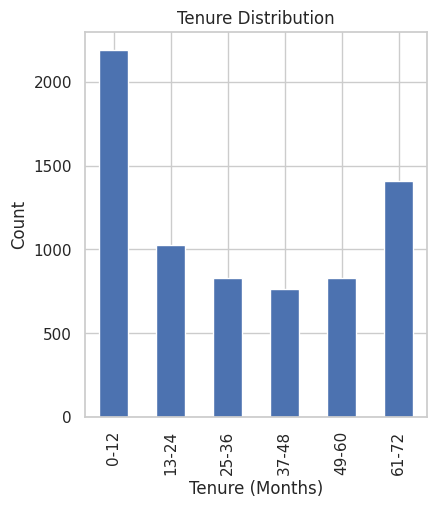

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
df3['tenure_bin'].value_counts().sort_index().plot(kind='bar', title='Tenure Distribution')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

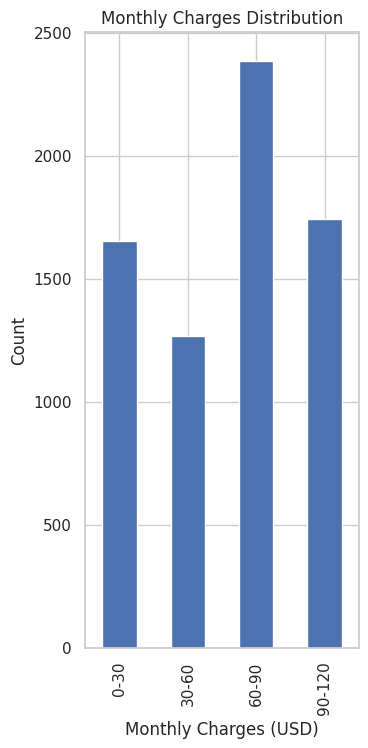

In [ ]:
plt.subplot(1, 3, 2)
df3['MonthlyCharges_bin'].value_counts().sort_index().plot(kind='bar', title='Monthly Charges Distribution')
plt.xlabel('Monthly Charges (USD)')
plt.ylabel('Count')

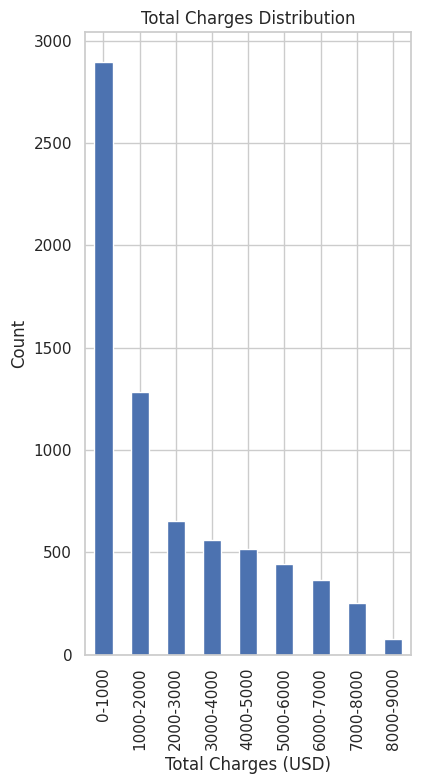

In [ ]:
plt.subplot(1, 3, 3)
df3['TotalCharges_bin'].value_counts().sort_index().plot(kind='bar', title='Total Charges Distribution')
plt.xlabel('Total Charges (USD)')
plt.ylabel('Count')
plt.tight_layout()

Text(0.5, 0, 'Tenure (Months)')

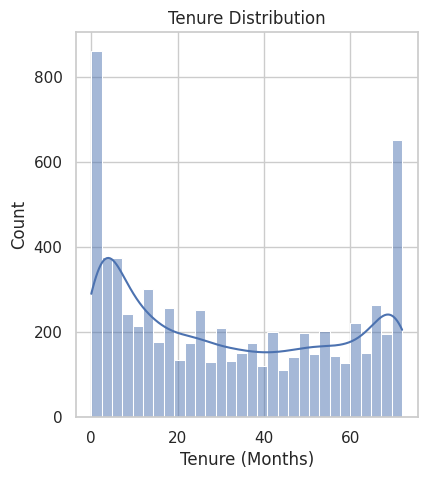

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df3['tenure'], kde=True, bins=30)
plt.title('Tenure Distribution')
plt.xlabel('Tenure (Months)')

Text(0.5, 0, 'Monthly Charges (USD)')

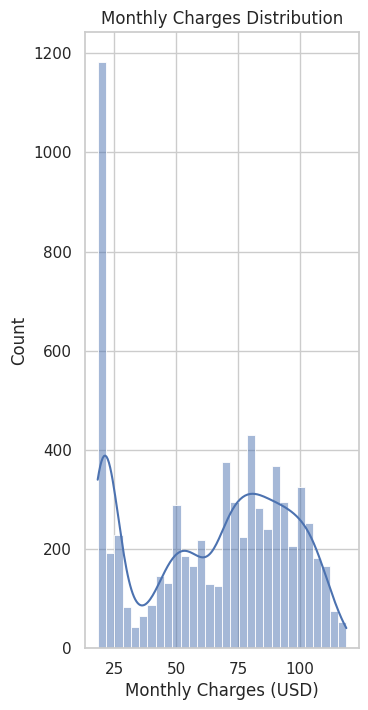

In [ ]:
plt.subplot(1, 3, 2)
sns.histplot(df3['MonthlyCharges'], kde=True, bins=30)
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges (USD)')

Text(0.5, 0, 'Total Charges (USD)')

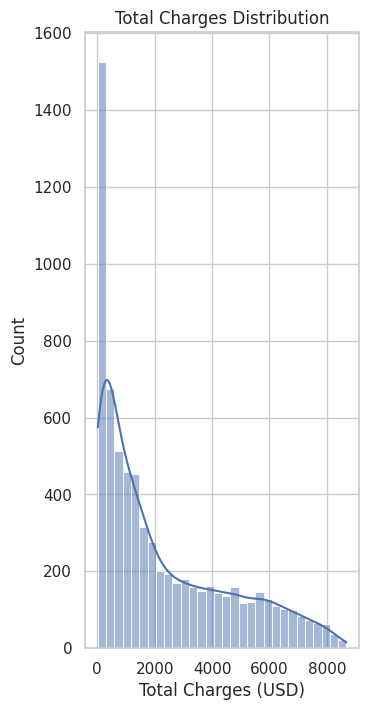

In [ ]:
plt.subplot(1, 3, 3)
sns.histplot(df3['TotalCharges'], kde=True, bins=30)
plt.title('Total Charges Distribution')
plt.xlabel('Total Charges (USD)')

Text(0, 0.5, 'Tenure (Months)')

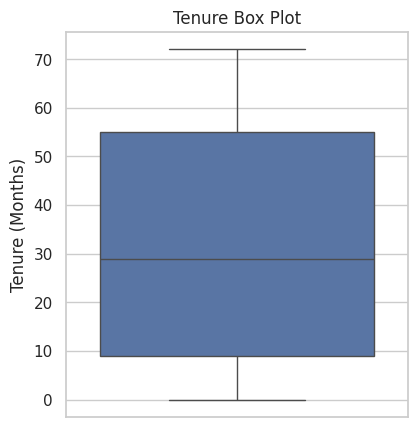

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df3['tenure'])
plt.title('Tenure Box Plot')
plt.ylabel('Tenure (Months)')

Text(0, 0.5, 'Monthly Charges (USD)')

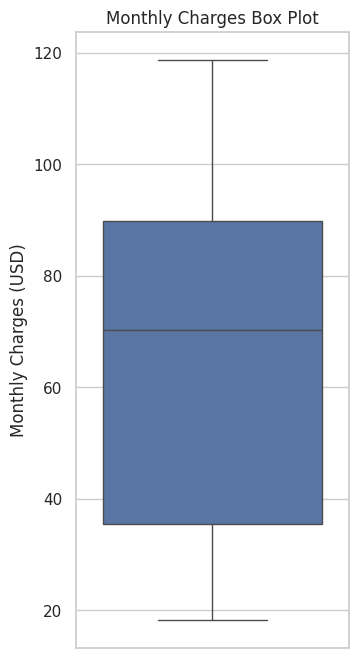

In [ ]:
plt.subplot(1, 3, 2)
sns.boxplot(y=df3['MonthlyCharges'])
plt.title('Monthly Charges Box Plot')
plt.ylabel('Monthly Charges (USD)')

Text(0, 0.5, 'Total Charges (USD)')

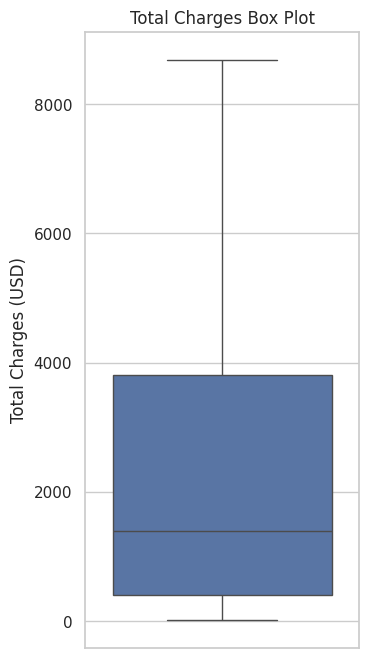

In [ ]:
plt.subplot(1, 3, 3)
sns.boxplot(y=df3['TotalCharges'])
plt.title('Total Charges Box Plot')
plt.ylabel('Total Charges (USD)')

## Bivariate Analysis

Text(0, 0.5, 'Monthly Charges (USD)')

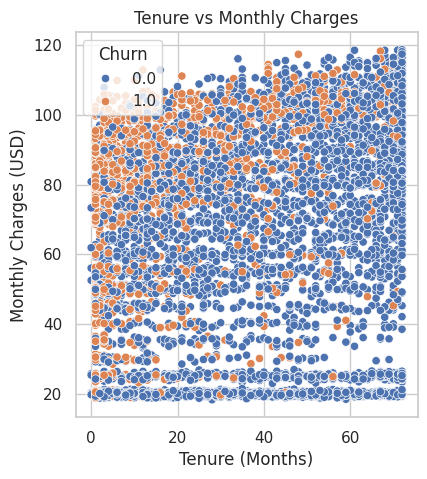

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df3)
plt.title('Tenure vs Monthly Charges')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges (USD)')

Text(0, 0.5, 'Total Charges (USD)')

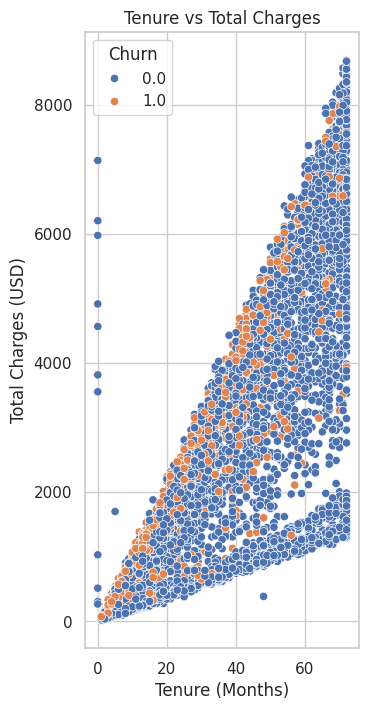

In [ ]:
plt.subplot(1, 3, 2)
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=df3)
plt.title('Tenure vs Total Charges')
plt.xlabel('Tenure (Months)')
plt.ylabel('Total Charges (USD)')

Text(0, 0.5, 'Total Charges (USD)')

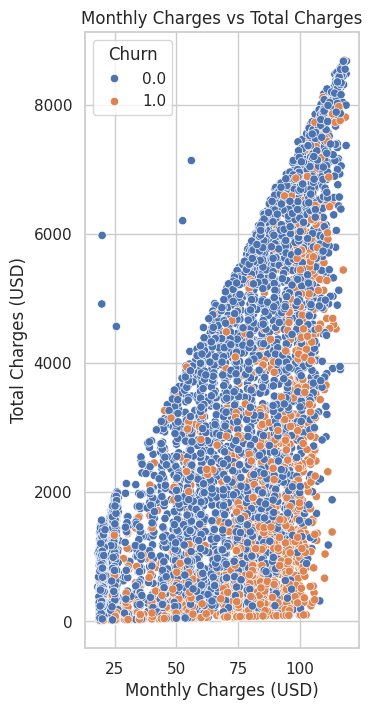

In [ ]:
plt.subplot(1, 3, 3)
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df3)
plt.title('Monthly Charges vs Total Charges')
plt.xlabel('Monthly Charges (USD)')
plt.ylabel('Total Charges (USD)')

Text(0, 0.5, 'Tenure (Months)')

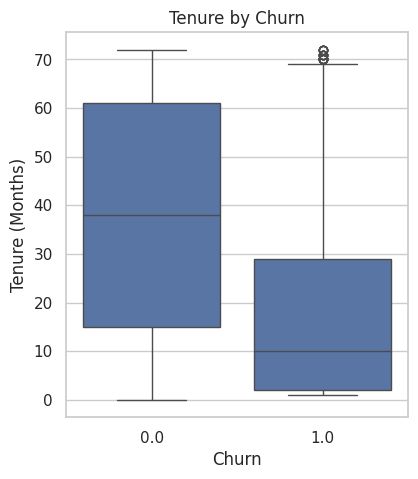

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='Churn', y='tenure', data=df3)
plt.title('Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')

Text(0, 0.5, 'Monthly Charges (USD)')

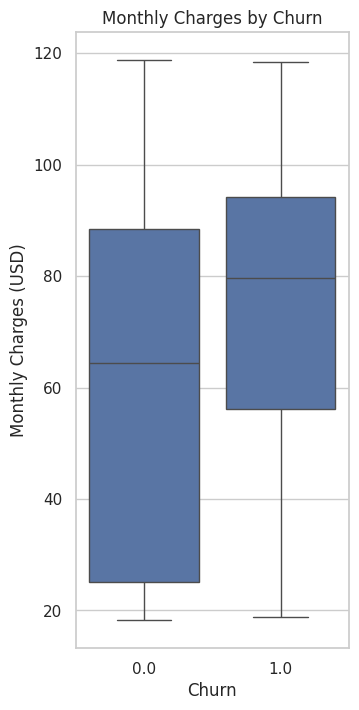

In [ ]:
plt.subplot(1, 3, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df3)
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges (USD)')

Text(0, 0.5, 'Total Charges (USD)')

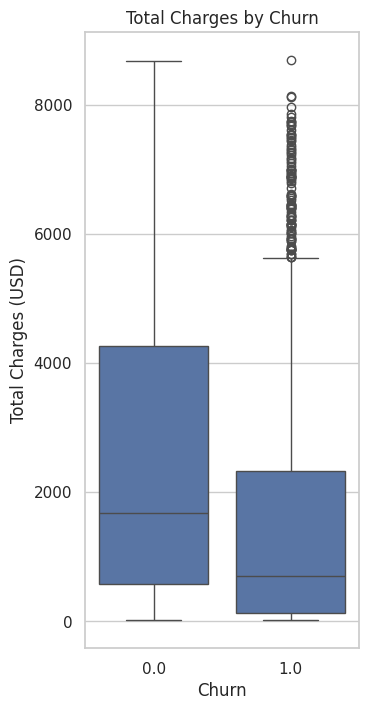

In [ ]:
plt.subplot(1, 3, 3)
sns.boxplot(x='Churn', y='TotalCharges', data=df3)
plt.title('Total Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges (USD)')

## Multivariate Analysis

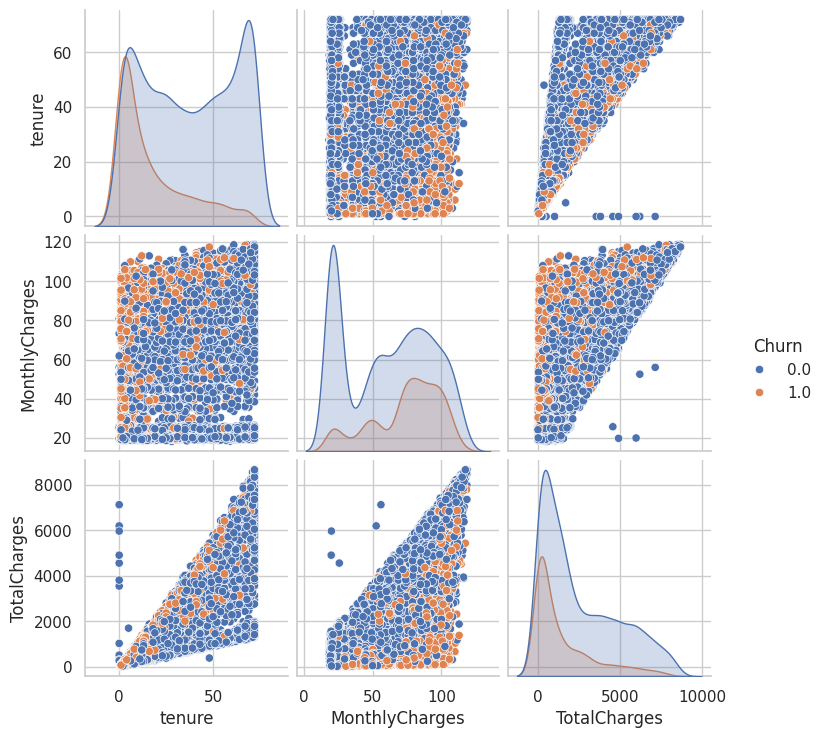

In [ ]:
sns.pairplot(df3[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn', diag_kind='kde')

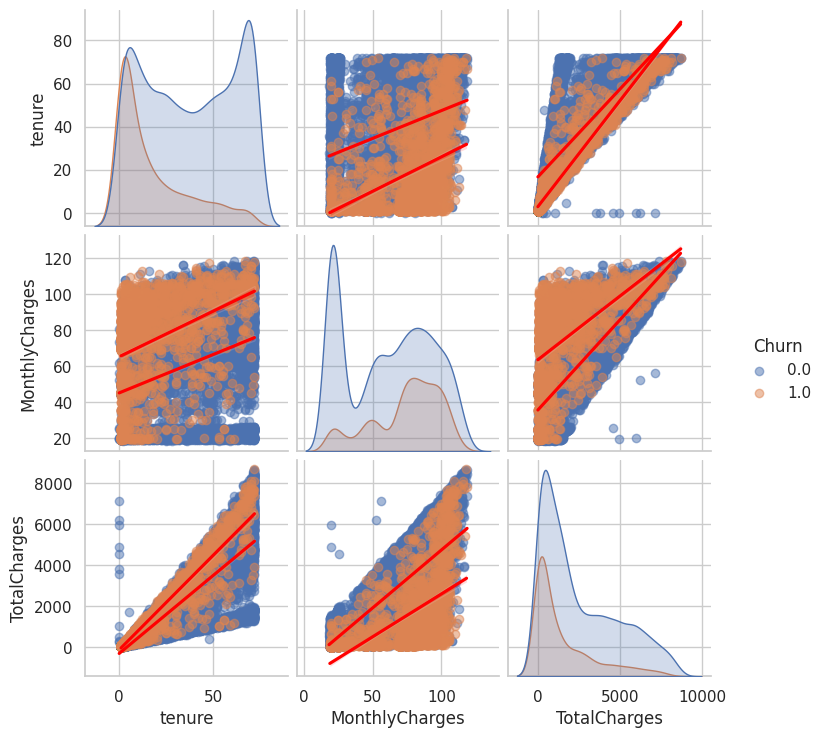

In [ ]:
sns.pairplot(
    df3[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']],
    hue='Churn',
    diag_kind='kde',
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}},
    kind='reg'
)

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

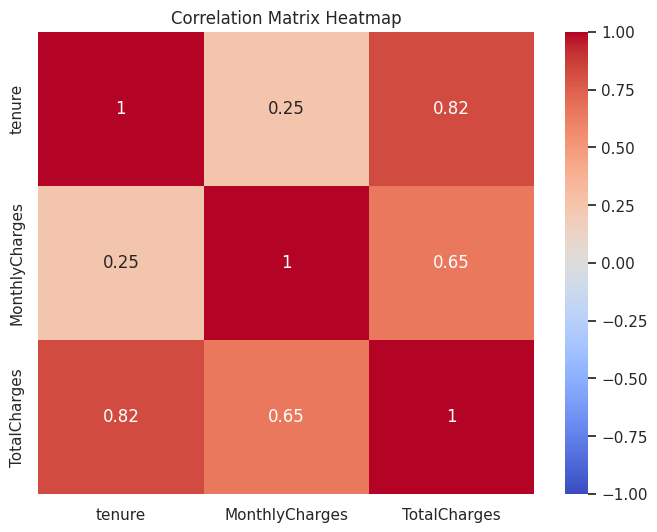

In [ ]:
plt.figure(figsize=(8, 6))
corr_matrix = df3[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')

## 1D Analysis

In [ ]:
from scipy.stats import skew

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
skewness = {col: skew(df3[col]) for col in numerical_cols}
print("Skewness:")
for col, sk in skewness.items():
    print(f"{col}: {sk:.3f}")

Skewness:
tenure: 0.239
MonthlyCharges: -0.221
TotalCharges: 0.959


In [ ]:
quantiles = df3[numerical_cols].quantile([0.1, 0.25, 0.5, 0.75, 0.9])
print("\nQuantiles:")
print(quantiles)


Quantiles:
      tenure  MonthlyCharges  TotalCharges
0.10     2.0          20.050        84.610
0.25     9.0          35.525       401.675
0.50    29.0          70.350      1398.250
0.75    55.0          89.850      3803.050
0.90    69.0         102.640      5979.140


In [ ]:
print("\nFrequency Distributions:")
print("Tenure:")
print(df3['tenure_bin'].value_counts().sort_index())
print("\nMonthly Charges:")
print(df3['MonthlyCharges_bin'].value_counts().sort_index())
print("\nTotal Charges:")
print(df3['TotalCharges_bin'].value_counts().sort_index())


Frequency Distributions:
Tenure:
tenure_bin
0-12     2187
13-24    1023
25-36     831
37-48     763
49-60     832
61-72    1407
Name: count, dtype: int64

Monthly Charges:
MonthlyCharges_bin
0-30      1652
30-60     1266
60-90     2385
90-120    1740
Name: count, dtype: int64

Total Charges:
TotalCharges_bin
0-1000       2896
1000-2000    1284
2000-3000     652
3000-4000     558
4000-5000     515
5000-6000     444
6000-7000     366
7000-8000     250
8000-9000      78
Name: count, dtype: int64


In [ ]:
print("\nChurn Analysis:")
print(df['Churn'].value_counts())
print("\nChurn Proportions:")
print(df['Churn'].value_counts(normalize=True))


Churn Analysis:
Churn
No     5172
Yes    1868
?         2
Name: count, dtype: int64

Churn Proportions:
Churn
No     0.734450
Yes    0.265266
?      0.000284
Name: proportion, dtype: float64


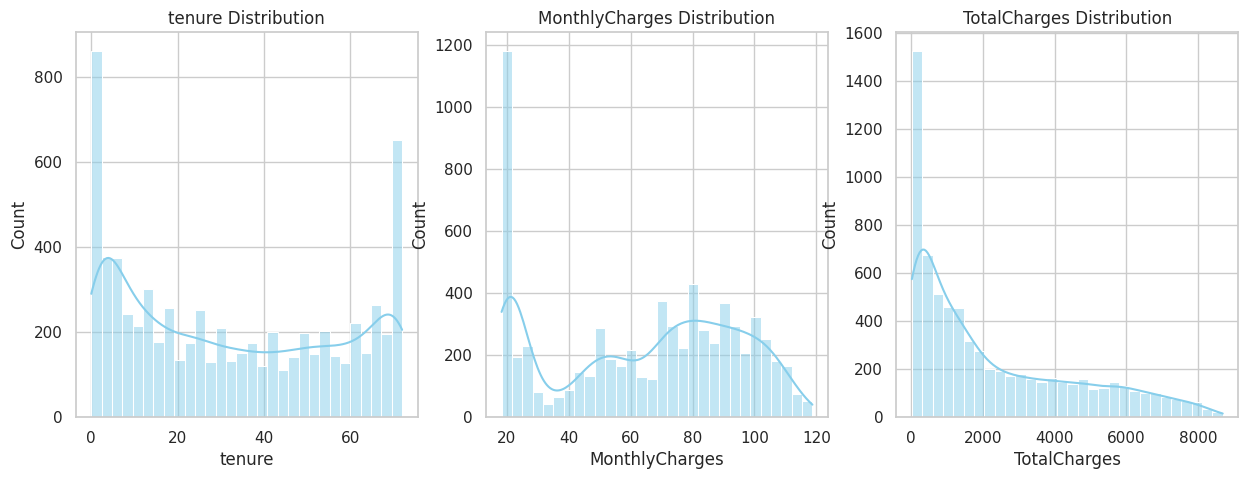

In [ ]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df3[col], kde=True, bins=30, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')

Text(0, 0.5, 'Count')

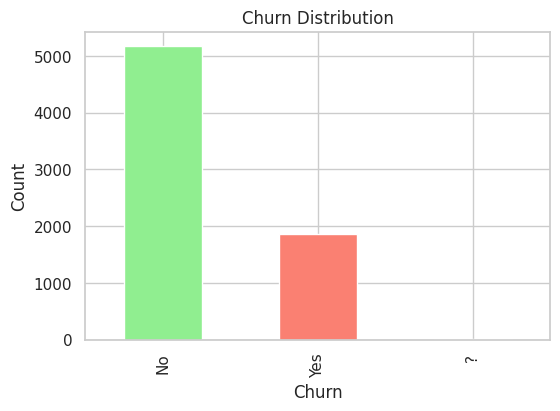

In [ ]:
plt.figure(figsize=(6, 4))
df['Churn'].value_counts().plot(kind='bar', color=['lightgreen', 'salmon'], title='Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')

## 2D Analysis

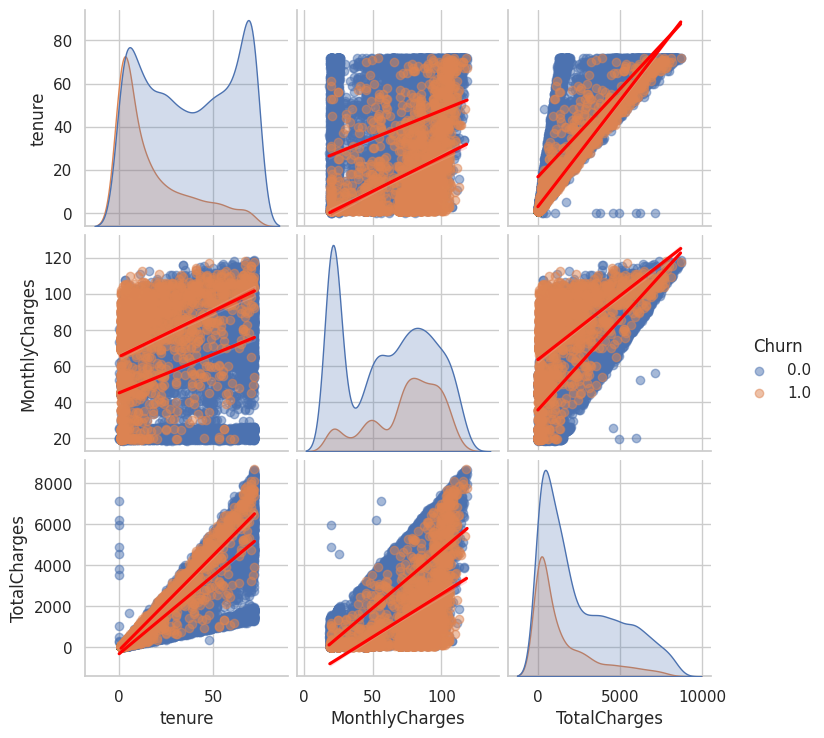

In [ ]:
sns.pairplot(
    df3[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']],
    hue='Churn',
    kind='reg',
    diag_kind='kde',
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}}
)

/tmp/ipython-input-2854423443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y=col, data=df3, palette=['lightgreen', 'salmon'])
/tmp/ipython-input-2854423443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y=col, data=df3, palette=['lightgreen', 'salmon'])
/tmp/ipython-input-2854423443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y=col, data=df3, palette=['lightgreen', 'salmon'])


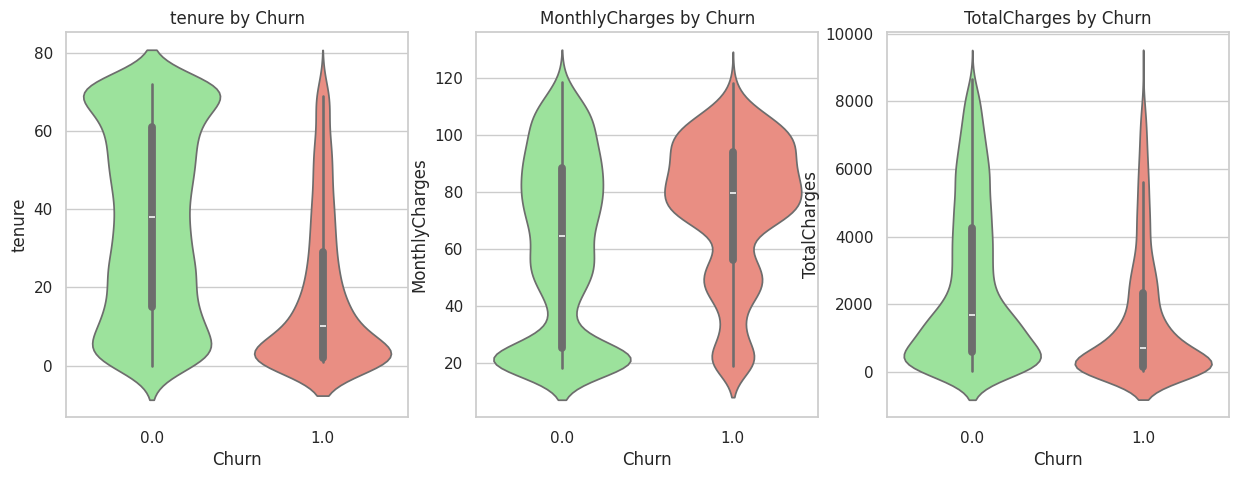

In [ ]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(x='Churn', y=col, data=df3, palette=['lightgreen', 'salmon'])
    plt.title(f'{col} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)

Text(0, 0.5, 'Count')

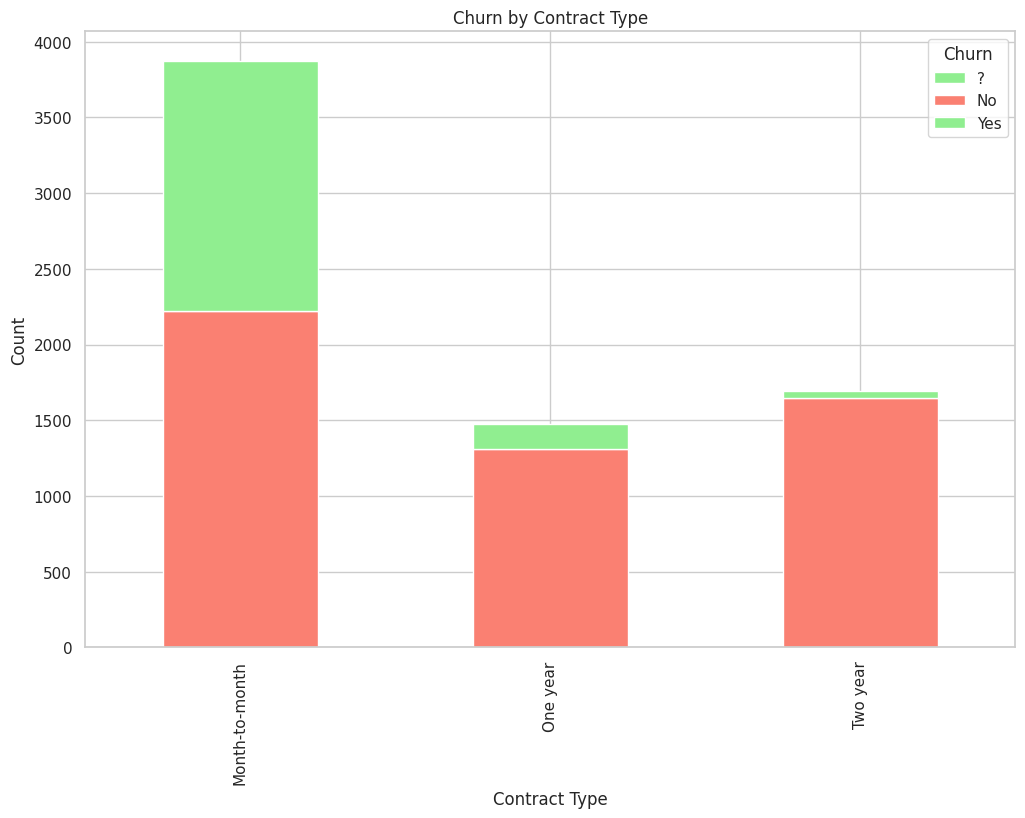

In [ ]:
pivot_table = df.pivot_table(index='Contract', columns='Churn', values='customerID', aggfunc='count', fill_value=0)
pivot_table.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'], title='Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')

## 3D Analysis

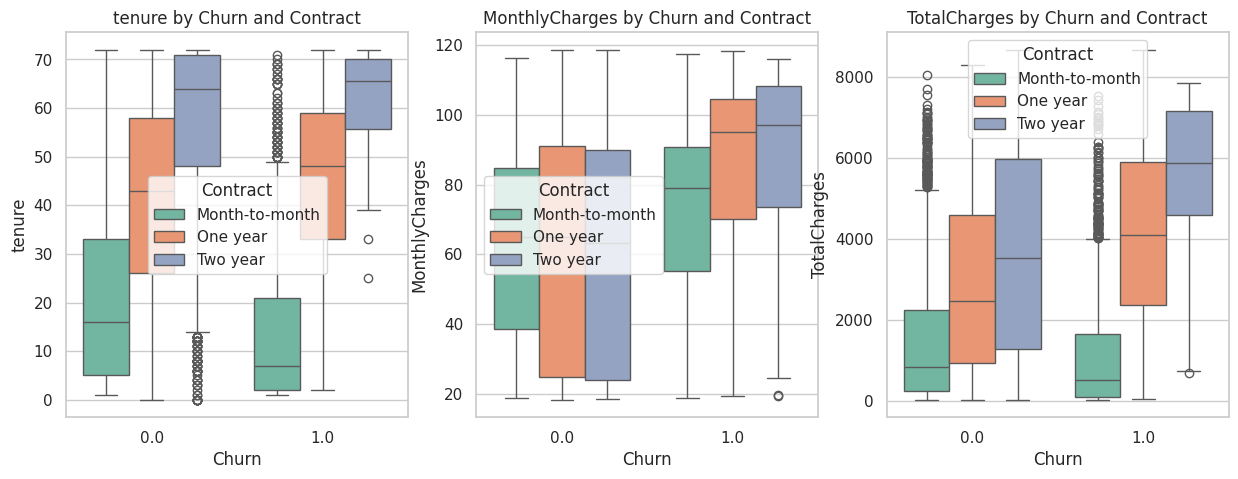

In [ ]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Churn', y=col, hue='Contract', data=df3, palette='Set2')
    plt.title(f'{col} by Churn and Contract')
    plt.xlabel('Churn')
    plt.ylabel(col)

## K Means Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib import cm

In [ ]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
features = ['tenure', 'MonthlyCharges', 'TotalCharges']
X = df3[features]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
wcss = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)


Text(0.5, 1.0, 'Elbow Method for Optimal k')

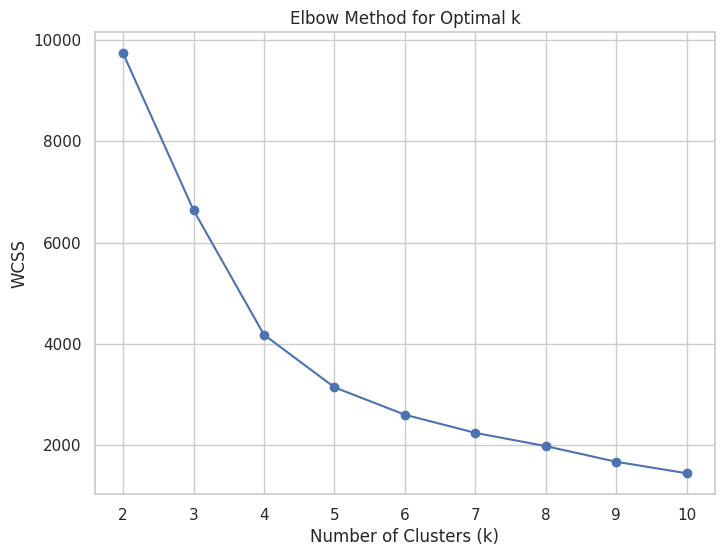

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')



Text(0.5, 1.0, 'Silhouette Scores for Different k')

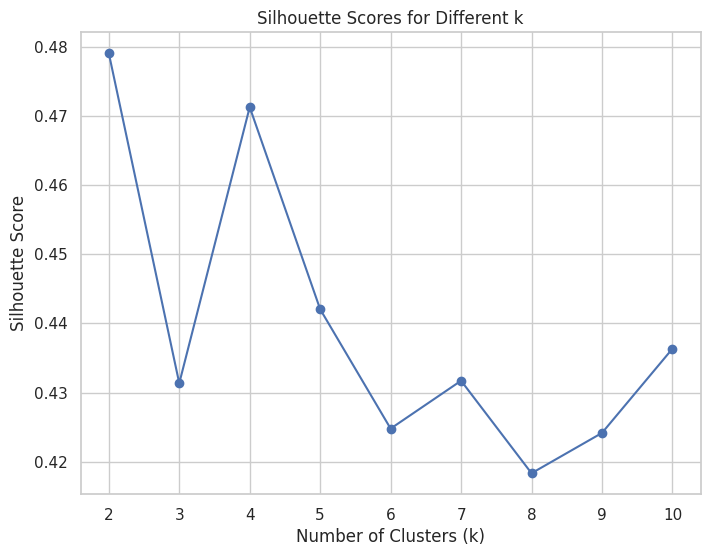

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')

In [ ]:
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df3['Cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(cluster_centers, columns=features)
print("\nCluster Centers:")
print(centers_df)


Cluster Centers:
      tenure  MonthlyCharges  TotalCharges
0  53.791759       27.286860   1448.432572
1  65.372967      101.439380   6625.992886
2  10.299548       29.894351    308.027372
3  29.349134       82.921468   2417.322106
4  55.874749       78.365932   4288.708717
5   7.546473       76.722281    570.016183


In [ ]:
print("\nCluster Sizes:")
print(df3['Cluster'].value_counts().sort_index())


Cluster Sizes:
Cluster
0     900
1     986
2    1550
3    1097
4     989
5    1521
Name: count, dtype: int64


In [ ]:
print("\nChurn Distribution per Cluster:")
churn_dist = df3.groupby('Cluster')['Churn'].value_counts(normalize=True).unstack().fillna(0)
print(churn_dist)


Churn Distribution per Cluster:
Churn         0.0       1.0
Cluster                    
0        0.962222  0.037778
1        0.855984  0.144016
2        0.761290  0.238710
3        0.683683  0.316317
4        0.868554  0.131446
5        0.444444  0.555556


Text(0.5, 1.0, 'Silhouette Plot for k=6')

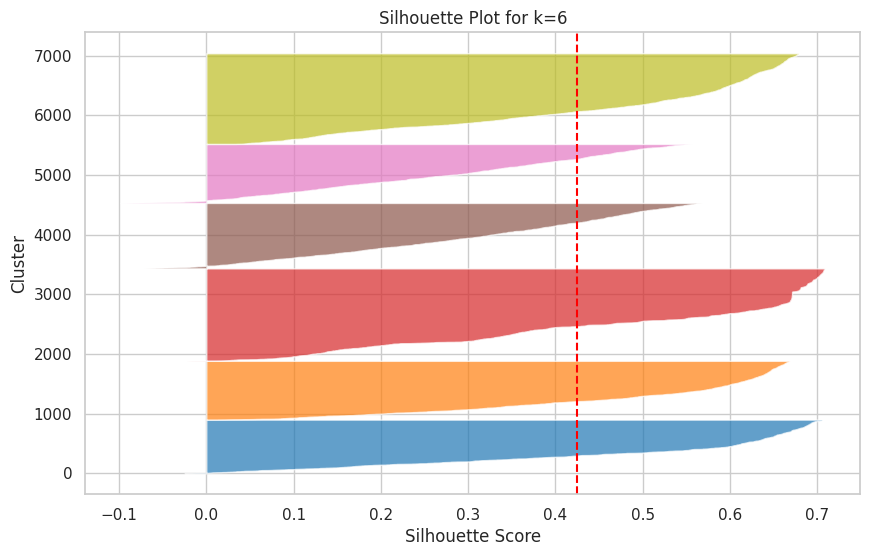

In [ ]:
silhouette_vals = silhouette_samples(X_scaled, df3['Cluster'])
plt.figure(figsize=(10, 6))
y_lower, y_upper = 0, 0
for i in range(optimal_k):
    cluster_silhouette_vals = silhouette_vals[df3['Cluster'] == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals,
                      facecolor=cm.tab10(i / optimal_k), alpha=0.7)
    y_lower += len(cluster_silhouette_vals)
plt.axvline(x=silhouette_score(X_scaled, df3['Cluster']), color='red', linestyle='--')
plt.xlabel('Silhouette Score')
plt.ylabel('Cluster')
plt.title(f'Silhouette Plot for k={optimal_k}')

Text(0, 0.5, 'Monthly Charges (USD)')

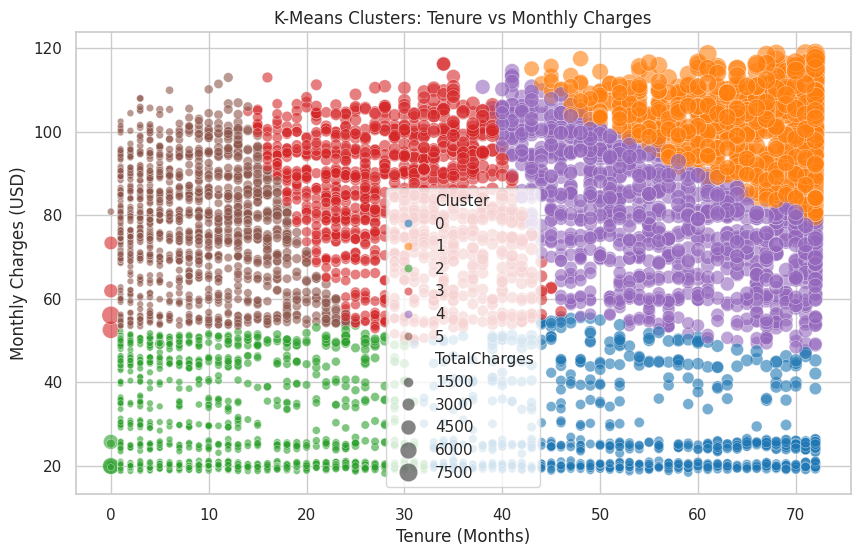

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Cluster', palette='tab10',
                size='TotalCharges', sizes=(20, 200), data=df3, alpha=0.6)
plt.title('K-Means Clusters: Tenure vs Monthly Charges')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges (USD)')

Text(0, 0.5, 'Monthly Charges (USD)')

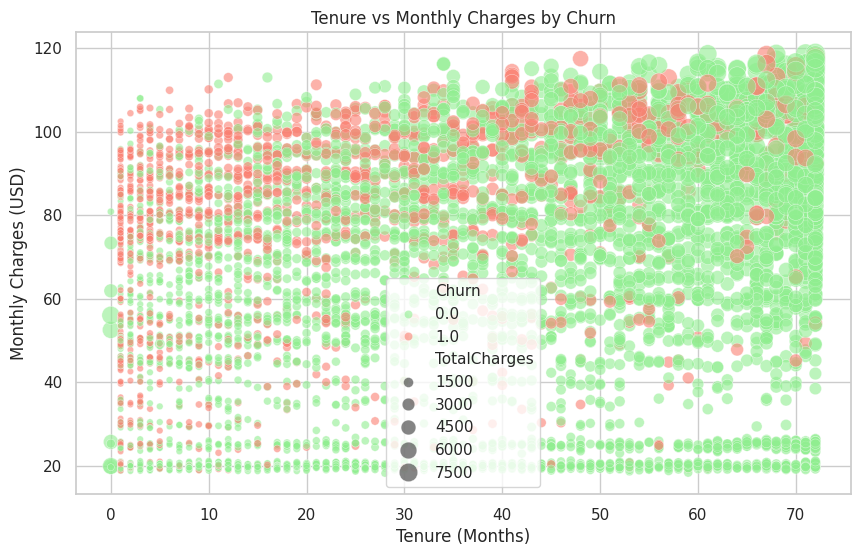

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', palette=['lightgreen', 'salmon'],
                size='TotalCharges', sizes=(20, 200), data=df3, alpha=0.6)
plt.title('Tenure vs Monthly Charges by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges (USD)')